In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.signal as sig
import scipy.stats as st

/home/rfajber/m3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Butterworth filter $|H(s)|^2$')

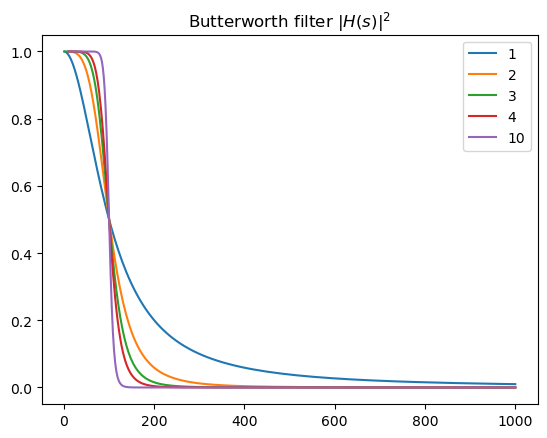

In [3]:
for n in [1,2,3,4,10]:
    b, a = sig.butter(n, 100, 'low', analog=True)
    w, h = sig.freqs(b, a)
    plt.plot(w,
             h*np.conj(h),
             label=n)
plt.legend()

plt.title('Butterworth filter $|H(s)|^2$')

In [4]:
nt = int(1e5)
dt = 0.01
tau = 2
r = 1 
a = 2
t=np.arange(0,nt*dt,dt)
x=np.zeros(nt)
for i in range(0,nt-1): 
    x[i+1]=np.exp(-dt/tau)*x[i]+r*np.sqrt(2*dt/tau)*np.random.randn(1)
s=a*np.sin(np.pi*t/10)
y=x+s

/tmp/ipykernel_13865/792181249.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1]=np.exp(-dt/tau)*x[i]+r*np.sqrt(2*dt/tau)*np.random.randn(1)


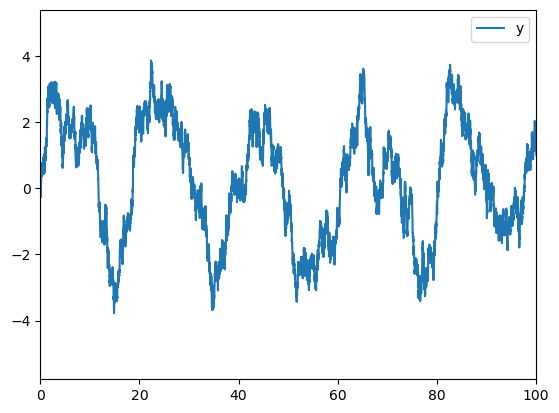

In [5]:
plt.plot(t,y,label='y')
#plt.plot(t,s,label='s')
#plt.plot(t,x,label='x')
plt.xlim([0,100])
plt.legend()

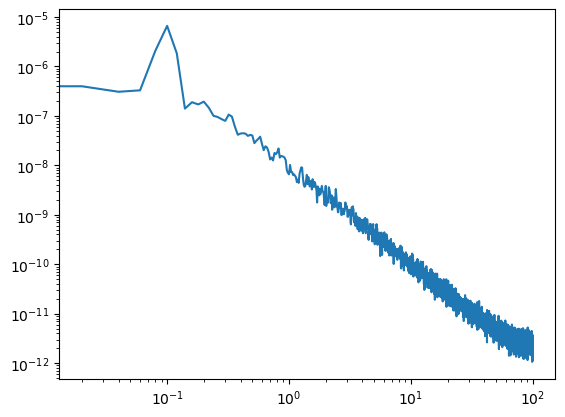

In [6]:
f,p = sig.welch(y,nperseg=int(1e4),fs=2/dt)
plt.loglog(f,p*dt/nt)

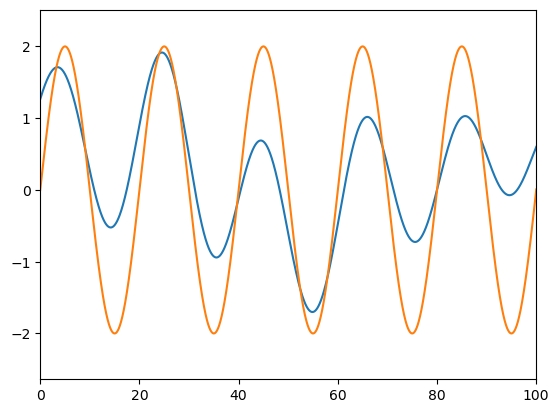

In [7]:
b, a = sig.butter(5, dt/10, 'low', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
plt.xlim([0,100])
plt.plot(t,s)

(0.0, 0.0050062578222778474)

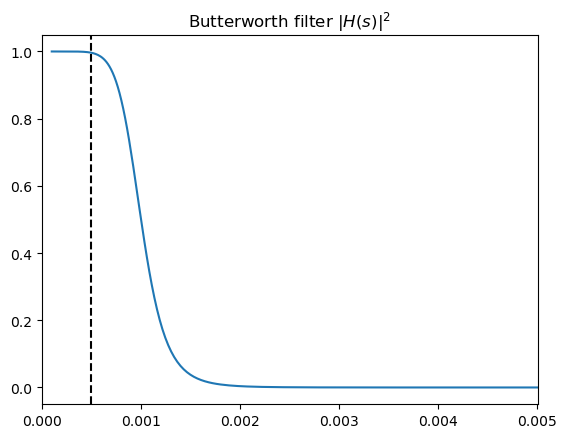

In [15]:
b, a = sig.butter(4, dt/5, 'low', analog=True)
w, h = sig.freqs(b, a)
plt.plot(w,
            h*np.conj(h),
            label=n)
plt.axvline(dt/10,color='k',linestyle='--')
plt.title('Butterworth filter $|H(s)|^2$')
plt.xlim([0,dt])

0.01909859317102744 50


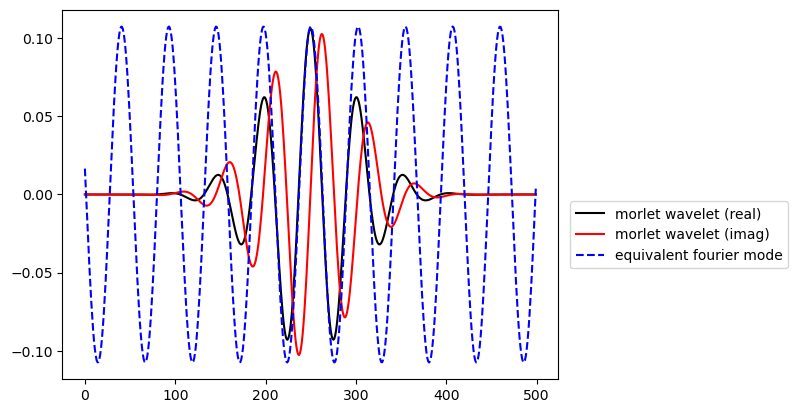

In [9]:
N=500
fs=1
s=50
w=6
f=w/(2*s*np.pi)
print(f,s)
w=sig.morlet2(N,s,w=w)
plt.plot(np.real(w),'k',label='morlet wavelet (real)')
plt.plot(np.imag(w),'r-',label='morlet wavelet (imag)')
plt.plot(1/np.sqrt(s)*0.76*np.cos(2*np.pi*np.arange(-len(w)//2,len(w)//2)*f),'b--',label='equivalent fourier mode')

plt.legend(bbox_to_anchor=[1.01,0.5])

/tmp/ipykernel_13865/1277082620.py:60: RuntimeWarning: invalid value encountered in divide
  widths[0]*coix/coix,widths[0]-np.abs(coix/(dt*np.sqrt(2))),


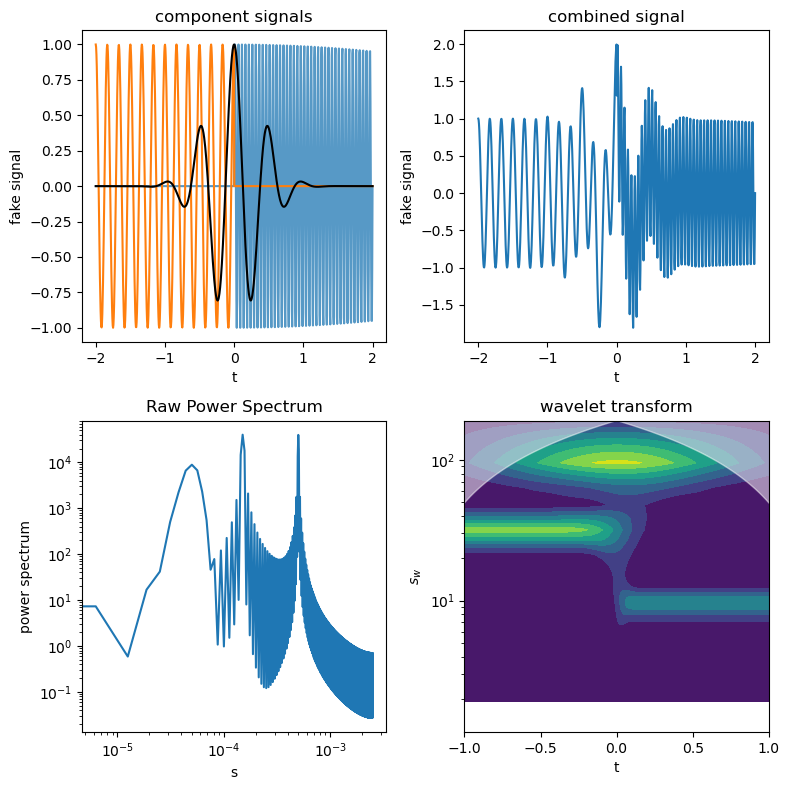

In [10]:
t, dt = np.linspace(-2, 2, 800, retstep=True)

sig00  = np.cos(2 * np.pi * 6 * t)
sig00[len(t)//2:]=0
sig02 = np.sin(2 * np.pi * 20 * t) 
sig02[:len(t)//2]=0
sig01  = sig.gausspulse(t - 0, fc=2)
sig1  = sig00 + sig01 + sig02

fs = 1/dt
w = 6.

freq = np.linspace(1, fs/2, 100)
widths = w*fs / (2*freq*np.pi)
cwtm=np.zeros([len(t),len(widths)],dtype=np.complex128)

for i,width in enumerate(widths):
    N=len(sig1)
    wl=np.conj(sig.morlet2(N,width,w=w))
    W=fft.fft(
        np.conj(
            wl
        )
    )
    ctemp=fft.ifft(W*fft.fft(sig1))
    cwtm[:len(t)//2,i] = ctemp[len(t)//2:]
    cwtm[len(t)//2:,i] = ctemp[:len(t)//2]

plt.figure(0,figsize=(8,8))

plt.subplot(2,2,2)
plt.plot(t,sig1)
plt.title('combined signal')
plt.xlabel('t')
plt.ylabel('fake signal')

plt.subplot(2,2,1)
plt.plot(t,sig02,alpha=0.75)
plt.plot(t,sig00)
plt.plot(t,sig01,'k')
plt.title('component signals')
plt.xlabel('t')
plt.ylabel('fake signal')

plt.subplot(2,2,3)
freqs_fft=fft.fftfreq(len(sig1))
P = fft.fft(sig1)*np.conj(fft.fft(sig1))
plt.plot(dt*fft.fftshift(freqs_fft),fft.fftshift(P))
plt.yscale('log')
plt.xscale('log')
#plt.xlim([-0.5,0.5])
plt.title('Raw Power Spectrum')
plt.xlabel('s')
plt.ylabel('power spectrum')

plt.subplot(2,2,4)
plt.contourf(t, widths, np.abs(cwtm).T)
coix = np.linspace(-2,2,201)
plt.fill_between(coix,
                 widths[0]*coix/coix,widths[0]-np.abs(coix/(dt*np.sqrt(2))),
                    color='white',
                    alpha=0.5                                                      
                 )
plt.yscale('log')
plt.xlim([-1,1])
plt.title('wavelet transform')
plt.xlabel('t')
plt.ylabel('$s_w$')

plt.tight_layout()

## Choice of Wavelet Function

<img src="../images/Wavelet_choices.png" width=50%, height=50%>

<img src="../images/WaveletSpectrum.png" width=50%, height=50%>

# Autocorrelation vs. Wavelet vs. Power Spectrum

## Autocorrelation 

Pros 
- summarizes all data (for stationary system)
- calculates correlation scales in the same units (e.g. autocorrelation time, not frequency)
- useful characterization of how independent data is 

Cons
- hard to interpret when there are strongly oscillatory signals 
- can be computationally expensive
- for long lags can create signals that look stronger than they are (don't over interpret the tails)

## Power Spectrum 

Pros
-  Computationally cheap
-  summarizes all data
-  connected to theory (e.g. all of ATOC 513)
-  identifies oscillatory signals relatively well 
  
Cons 
-  Needs multiple estimates to be useful most of the time
-  Edge effects can be a problem, especially in short
-  Cannot be related to specific points in the data set 

## Wavelets 

Pros 
- identifies regions that contribute different frequencies 
- deals with edge effects systematically  

Cons 
- Can be *very* computationally expensive depending on wavelet resolution 
- Hard to summarize results compactly sometimes (CWT is 2D instead of 1D)
- additional subjective choice in choosing the type of wavelet.

### A plausible decision tree

- Does the dataset have any oscillatory signals?
  - No: Autocorrelation
  - Yes: Do the oscillations change strongly in time?
    - No: Power spectrum 
    - Yes: Waveletts 